In [1]:
from transformato import load_config_yaml, SystemStructure, IntermediateStateFactory, ProposeMutationRoute
import rdkit.Chem as Chem
from IPython.display import SVG
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

RDKit WARNING: [22:59:46] Enabling RDKit 2019.09.2 jupyter extensions


Load the yaml configuration files

In [2]:
configuration = load_config_yaml(config='../config/ethane-ethanol-solvation-free-energy.yaml',
                       input_dir='../data/', output_dir='../data/')

/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/transformato-0.0.0+106.g41e88de.dirty-py3.7.egg/transformato/utils.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  settingsMap = yaml.load(stream)


Generate structure 1 as defined in the yaml file

In [3]:
s1 = SystemStructure(configuration, 'structure1')

/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:905: UserWarning: LONEPAIR type COLINEAR not supported; only BISEctor and RELAtive supported
  'RELAtive supported' % words[1])
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:832: UserWarning: No charge for WEI3
  warnings.warn('No charge for %s' % resname)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:867: UserWarning: WARNING: Ignoring "DELETE ACCE NE2" because entity type ACCE not used.
  'used.' % (line.strip(), entity_type))
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('NH2', 'CT2', 'CD'), <AngleType; k=50.000, theteq=107.000> with <AngleType; k=52.000, theteq=108.000>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-pa

Generate structure2

In [4]:
s2 = SystemStructure(configuration, 'structure2')

/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:511: ParameterWarning: Replacing angle ('NH2', 'CT2', 'CD'), <AngleType; k=50.000, theteq=107.000> with <AngleType; k=52.000, theteq=108.000>
  (key, self.angle_types[key], angle_type), ParameterWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/psf.py:319: CharmmWarning: Detected PSF molecule section that is WRONG. Resetting molecularity.
  'Resetting molecularity.', CharmmWarning)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/psf.py:319: CharmmWarning: Detected PSF molecule section that is WRONG. Resetting molecularity.
  'Resetting molecularity.', CharmmWarning)
[system.py:247 - _generate_rdkit_mol()] SDF file not found: /home/mwieder/Work/Projects/transformato/data/ethanol/waterbox/UNL/UNL.sdf
[system.py:247 - _generate_rdkit_mol()] SDF file not found: /home/mwieder/Work/Projects/transformato/data/ethanol/w

Propose a route from structure1 and structure2 to a commen core that has the same bonded parameters, atom types and charges.
THe commen core is highlighted on both structures.

[mutate.py:94 - _calculate_common_core()] Mol in SMILES format: [H]C([H])([H])C([H])([H])[H].
[mutate.py:94 - _calculate_common_core()] Mol in SMILES format: [H]OC([H])([H])C([H])([H])[H].
[mutate.py:102 - _calculate_common_core()] Substructure match: [#6](-[#6](-[#1])(-[#1])-[#1])(-[#1])-[#1]
[mutate.py:108 - _calculate_common_core()] Substructere match idx: (0, 1, 5, 6, 7, 2, 3)


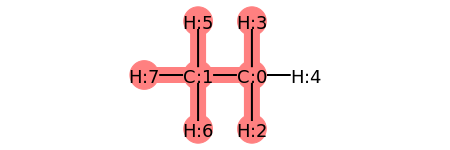

[mutate.py:111 - _calculate_common_core()] Substructere match idx: (1, 2, 5, 6, 7, 3, 4)


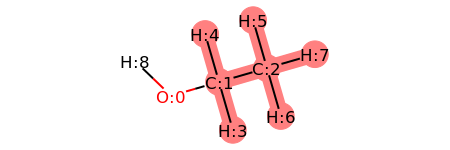

In [5]:
a = ProposeMutationRoute(s1, s2)

In [10]:
a.add_idx_to_common_core_of_mol1(4)

In [11]:
a.add_idx_to_common_core_of_mol2(0)

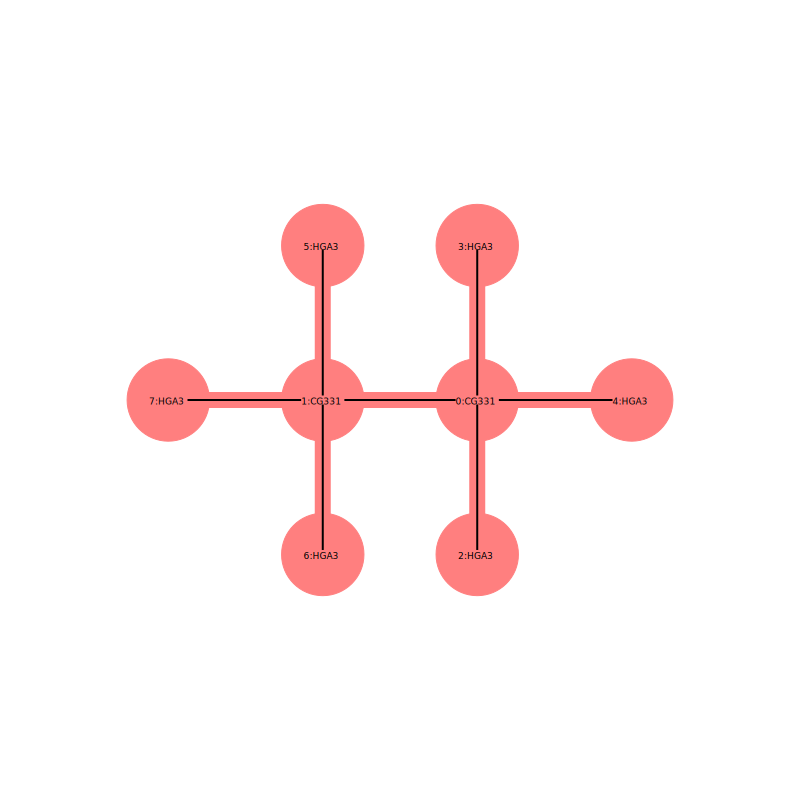

In [14]:
SVG(a.show_common_core_on_mol1())

Show both commen cores

Generate the mutation list that is necessary to transform structure1 to the common core.
The intermediate states that are generated are located in different directories and can be run independently. The output_path variable defines where these directories are located.

In [15]:
mutation_list = a.generate_mutations_to_common_core_for_mol1(nr_of_steps_for_el=5, nr_of_steps_for_bonded_parameters=5)
i = IntermediateStateFactory(system=s1, mutation_list=mutation_list, configuration=configuration)
i.generate_intermediate_states()

[mutate.py:217 - _transform_common_core()] ###########
[mutate.py:218 - _transform_common_core()] Atom that needs to be transformed: <Atom C1 [0]; In LIG 0>.
[mutate.py:219 - _transform_common_core()] Atom type of atom in cc1: CG331.
[mutate.py:220 - _transform_common_core()] Template atom: <Atom C1 [1]; In UNL 0>.
[mutate.py:221 - _transform_common_core()] Atom type of atom in cc2: CG321.
[mutate.py:217 - _transform_common_core()] ###########
[mutate.py:218 - _transform_common_core()] Atom that needs to be transformed: <Atom H1 [2]; In LIG 0>.
[mutate.py:219 - _transform_common_core()] Atom type of atom in cc1: HGA3.
[mutate.py:220 - _transform_common_core()] Template atom: <Atom H1 [3]; In UNL 0>.
[mutate.py:221 - _transform_common_core()] Atom type of atom in cc2: HGA2.
[mutate.py:217 - _transform_common_core()] ###########
[mutate.py:218 - _transform_common_core()] Atom that needs to be transformed: <Atom H2 [3]; In LIG 0>.
[mutate.py:219 - _transform_common_core()] Atom type of at

[state.py:177 - _copy_files()] No restart file found for waterbox -- starting simulation from crd file.
[state.py:177 - _copy_files()] No restart file found for vacuum -- starting simulation from crd file.
[state.py:186 - _copy_files()] No crd file found for vacuum -- using parmed system structure to create crd file.
[state.py:78 - generate_intermediate_states()] Current step: 5
[state.py:464 - _init_intermediate_state_dir()]  - Created directory: - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/ethane/intst6
[state.py:466 - _init_intermediate_state_dir()]  - Writing in - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/ethane/intst6
[state.py:80 - generate_intermediate_states()] #########################################
[state.py:81 - generate_intermediate_states()] #########################################
[mutate.py:614 - mutate()] Charges to zero mutation
[mutate.py:560 - _compensate_charge()] ##############
[mut

[mutate.py:387 - _mutate_bonds()] 343.20000000000005
[mutate.py:391 - _mutate_bonds()] New k: 343.20000000000005
[mutate.py:393 - _mutate_bonds()] Old req: 1.111
[mutate.py:395 - _mutate_bonds()] Modified bond: <Bond <Atom C1 [0]; In LIG 0>--<Atom H3 [4]; In LIG 0>; type=<BondType; k=322.000, req=1.111>>
[mutate.py:398 - _mutate_bonds()] Bond(k=343.20000000000005, req=1.1728)
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C2 [1]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H1 [2]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C2 [2]; In UNL 0>--<Atom C1 [1]; In UNL 0>--<Atom H1 [3]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 37.5
[mutate.py:437 - _mutate_angles()] New k: 36.92
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[mutate.py:431 - _mu

[mutate.py:393 - _mutate_bonds()] Old req: 1.53
[mutate.py:395 - _mutate_bonds()] Modified bond: <Bond <Atom C1 [0]; In LIG 0>--<Atom C2 [1]; In LIG 0>; type=<BondType; k=222.500, req=1.530>>
[mutate.py:398 - _mutate_bonds()] Bond(k=222.5, req=1.5296000000000003)
[mutate.py:379 - _mutate_bonds()] ##############################
[mutate.py:380 - _mutate_bonds()] 0.2
[mutate.py:381 - _mutate_bonds()] Modifying bond: <Bond <Atom C1 [0]; In LIG 0>--<Atom H1 [2]; In LIG 0>; type=<BondType; k=322.000, req=1.111>>
[mutate.py:383 - _mutate_bonds()] Template bond: <Bond <Atom C1 [1]; In UNL 0>--<Atom H1 [3]; In UNL 0>; type=<BondType; k=309.000, req=1.111>>
[mutate.py:384 - _mutate_bonds()] Original value for k: 322.0
[mutate.py:385 - _mutate_bonds()] Target k: 309.0
[mutate.py:387 - _mutate_bonds()] 319.40000000000003
[mutate.py:391 - _mutate_bonds()] New k: 319.40000000000003
[mutate.py:393 - _mutate_bonds()] Old req: 1.111
[mutate.py:395 - _mutate_bonds()] Modified bond: <Bond <Atom C1 [0]; I

[mutate.py:437 - _mutate_angles()] New k: 36.92
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[state.py:279 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:280 - _write_rtf_file()]   + Atom-Name: C1
[state.py:281 - _write_rtf_file()]   + Atom-Type: RRR0
[state.py:282 - _write_rtf_file()]   + Atom Dummy Type: RRR0
[state.py:279 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:280 - _write_rtf_file()]   + Atom-Name: H1
[state.py:281 - _write_rtf_file()]   + Atom-Type: RRR1
[state.py:282 - _write_rtf_file()]   + Atom Dummy Type: RRR1
[state.py:279 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:280 - _write_rtf_file()]   + Atom-Name: H2
[state.py:281 - _write_rtf_file()]   + Atom-Type: RRR2
[state.py:282 - _write_rtf_file()]   + Atom Dummy Type: RRR2
[state.py:279 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:280 - _write_rtf_file()]   + Atom-Name: H3
[state.py:281 - _write_rtf_file(

[mutate.py:398 - _mutate_bonds()] Bond(k=222.5, req=1.5292)
[mutate.py:379 - _mutate_bonds()] ##############################
[mutate.py:380 - _mutate_bonds()] 0.4
[mutate.py:381 - _mutate_bonds()] Modifying bond: <Bond <Atom C1 [0]; In LIG 0>--<Atom H1 [2]; In LIG 0>; type=<BondType; k=322.000, req=1.111>>
[mutate.py:383 - _mutate_bonds()] Template bond: <Bond <Atom C1 [1]; In UNL 0>--<Atom H1 [3]; In UNL 0>; type=<BondType; k=309.000, req=1.111>>
[mutate.py:384 - _mutate_bonds()] Original value for k: 322.0
[mutate.py:385 - _mutate_bonds()] Target k: 309.0
[mutate.py:387 - _mutate_bonds()] 316.8
[mutate.py:391 - _mutate_bonds()] New k: 316.8
[mutate.py:393 - _mutate_bonds()] Old req: 1.111
[mutate.py:395 - _mutate_bonds()] Modified bond: <Bond <Atom C1 [0]; In LIG 0>--<Atom H1 [2]; In LIG 0>; type=<BondType; k=322.000, req=1.111>>
[mutate.py:398 - _mutate_bonds()] Bond(k=316.8, req=1.111)
[mutate.py:379 - _mutate_bonds()] ##############################
[mutate.py:380 - _mutate_bonds()

[mutate.py:341 - _mutate_atoms()] New epsilon: -0.06920000000000001
[mutate.py:344 - _mutate_atoms()] Real rmin: 2.05
[mutate.py:346 - _mutate_atoms()] New rmin: 2.034
[mutate.py:335 - _mutate_atoms()] Modifying atom: <Atom H1 [2]; In LIG 0>
[mutate.py:336 - _mutate_atoms()] Template atom: <Atom H1 [3]; In UNL 0>
[mutate.py:339 - _mutate_atoms()] Real epsilon: -0.024
[mutate.py:341 - _mutate_atoms()] New epsilon: -0.0284
[mutate.py:344 - _mutate_atoms()] Real rmin: 1.34
[mutate.py:346 - _mutate_atoms()] New rmin: 1.34
[mutate.py:335 - _mutate_atoms()] Modifying atom: <Atom H2 [3]; In LIG 0>
[mutate.py:336 - _mutate_atoms()] Template atom: <Atom H2 [4]; In UNL 0>
[mutate.py:339 - _mutate_atoms()] Real epsilon: -0.024
[mutate.py:341 - _mutate_atoms()] New epsilon: -0.0284
[mutate.py:344 - _mutate_atoms()] Real rmin: 1.34
[mutate.py:346 - _mutate_atoms()] New rmin: 1.34
[mutate.py:335 - _mutate_atoms()] Modifying atom: <Atom H3 [4]; In LIG 0>
[mutate.py:336 - _mutate_atoms()] Template ato

[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C1 [0]; In LIG 0>--<Atom C2 [1]; In LIG 0>--<Atom H4 [5]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C1 [1]; In UNL 0>--<Atom C2 [2]; In UNL 0>--<Atom H3 [5]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 37.5
[mutate.py:437 - _mutate_angles()] New k: 36.34
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C1 [0]; In LIG 0>--<Atom C2 [1]; In LIG 0>--<Atom H5 [6]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C1 [1]; In UNL 0>--<Atom C2 [2]; In UNL 0>--<Atom H4 [6]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k 

[mutate.py:341 - _mutate_atoms()] New epsilon: -0.030600000000000002
[mutate.py:344 - _mutate_atoms()] Real rmin: 1.34
[mutate.py:346 - _mutate_atoms()] New rmin: 1.34
[mutate.py:335 - _mutate_atoms()] Modifying atom: <Atom H2 [3]; In LIG 0>
[mutate.py:336 - _mutate_atoms()] Template atom: <Atom H2 [4]; In UNL 0>
[mutate.py:339 - _mutate_atoms()] Real epsilon: -0.024
[mutate.py:341 - _mutate_atoms()] New epsilon: -0.030600000000000002
[mutate.py:344 - _mutate_atoms()] Real rmin: 1.34
[mutate.py:346 - _mutate_atoms()] New rmin: 1.34
[mutate.py:335 - _mutate_atoms()] Modifying atom: <Atom H3 [4]; In LIG 0>
[mutate.py:336 - _mutate_atoms()] Template atom: <Atom O [0]; In UNL 0>
[mutate.py:339 - _mutate_atoms()] Real epsilon: -0.024
[mutate.py:341 - _mutate_atoms()] New epsilon: -0.12485999999999998
[mutate.py:344 - _mutate_atoms()] Real rmin: 1.34
[mutate.py:346 - _mutate_atoms()] New rmin: 1.595
[mutate.py:379 - _mutate_bonds()] ##############################
[mutate.py:380 - _mutate_bon

[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C1 [1]; In UNL 0>--<Atom C2 [2]; In UNL 0>--<Atom H3 [5]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 37.5
[mutate.py:437 - _mutate_angles()] New k: 35.760000000000005
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C1 [0]; In LIG 0>--<Atom C2 [1]; In LIG 0>--<Atom H5 [6]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C1 [1]; In UNL 0>--<Atom C2 [2]; In UNL 0>--<Atom H4 [6]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 37.5
[mutate.py:437 - _mutate_angles()] New k: 35.760000000000005
[mutate.py:439 - _mutate_angles()] Old k: 110.

[mutate.py:435 - _mutate_angles()] Old k: 37.5
[mutate.py:437 - _mutate_angles()] New k: 60.42
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom H1 [2]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H2 [3]; In LIG 0>; type=<AngleType; k=35.500, theteq=108.400>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom H1 [3]; In UNL 0>--<Atom C1 [1]; In UNL 0>--<Atom H2 [4]; In UNL 0>; type=<AngleType; k=35.500, theteq=109.000>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 35.5
[mutate.py:437 - _mutate_angles()] New k: 35.5
[mutate.py:439 - _mutate_angles()] Old k: 108.4
[mutate.py:441 - _mutate_angles()] New k: 108.75999999999999
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom H1 [2]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H3 [4]; In LIG 0>; type=<AngleType; k=35.500, theteq=108.400>>
[mutate.py:432 - _

[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR2-RRR0-CG331-HGA3
[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR2-RRR0-CG331-HGA3
[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR2-RRR0-CG331-HGA3
[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR3-RRR0-CG331-HGA3
[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR3-RRR0-CG331-HGA3
[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR3-RRR0-CG331-HGA3
[state.py:177 - _copy_files()] No restart file found for waterbox -- starting simulation from crd file.
[state.py:177 - _copy_files()] No restart file found for vacuum -- starting simulation from crd file.
[state.py:186 - _copy_files()] No crd file found for vacuum -- using parmed system structure to create crd file.
[state.py:78 - generate_intermediate_states()] Current step: 4
[state.py:464 - _init_in

[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom H1 [3]; In UNL 0>--<Atom C1 [1]; In UNL 0>--<Atom H2 [4]; In UNL 0>; type=<AngleType; k=35.500, theteq=109.000>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 35.5
[mutate.py:437 - _mutate_angles()] New k: 35.5
[mutate.py:439 - _mutate_angles()] Old k: 108.4
[mutate.py:441 - _mutate_angles()] New k: 108.88
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom H1 [2]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H3 [4]; In LIG 0>; type=<AngleType; k=35.500, theteq=108.400>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom O [0]; In UNL 0>--<Atom C1 [1]; In UNL 0>--<Atom H1 [3]; In UNL 0>; type=<AngleType; k=45.900, theteq=108.890>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 35.5
[mutate.py:437 - _mutate_angles()] New k: 43.82
[mutate.py:439 - _mutate_angles()] Old k: 108.4
[mutate.py:441 - _mutate_

[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C2 [1]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H1 [2]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C2 [2]; In UNL 0>--<Atom C1 [1]; In UNL 0>--<Atom H1 [3]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 37.5
[mutate.py:437 - _mutate_angles()] New k: 35.18
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C2 [1]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H2 [3]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C2 [2]; In UNL 0>--<Atom C1 [1]; In UNL 0>--<Atom H2 [4]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: CG331-RRR0-RRR3
[state.py:340 - _write_prm_file()] CG331   RRR0    RRR3     68.06000 110.10000 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR1-RRR0-RRR2
[state.py:340 - _write_prm_file()] RRR1    RRR0    RRR2     35.50000 108.88000 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR1-RRR0-RRR3
[state.py:340 - _write_prm_file()] RRR1    RRR0    RRR3     43.82000 108.79200 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR2-RRR0-RRR3
[state.py:340 - _write_prm_file()] RRR2    RRR0    RRR3     43.82000 108.79200 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR0-CG331-HGA3
[state.py:340 - _write_prm_file()] RRR0    CG331   HGA3     35.18000 110.10000 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR0-CG331-HGA3
[state.py:340 - _write_prm_file()] RRR0    CG331   H

[mutate.py:437 - _mutate_angles()] New k: 34.6
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C2 [1]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H2 [3]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom C2 [2]; In UNL 0>--<Atom C1 [1]; In UNL 0>--<Atom H2 [4]; In UNL 0>; type=<AngleType; k=34.600, theteq=110.100>>
[mutate.py:433 - _mutate_angles()] Scaling k and theteq
[mutate.py:435 - _mutate_angles()] Old k: 37.5
[mutate.py:437 - _mutate_angles()] New k: 34.6
[mutate.py:439 - _mutate_angles()] Old k: 110.1
[mutate.py:441 - _mutate_angles()] New k: 110.1
[mutate.py:431 - _mutate_angles()] Modifying angle: <Angle <Atom C2 [1]; In LIG 0>--<Atom C1 [0]; In LIG 0>--<Atom H3 [4]; In LIG 0>; type=<AngleType; k=37.500, theteq=110.100>>
[mutate.py:432 - _mutate_angles()] Template bond: <Angle <Atom O [0]; In UNL 0>

[mutate.py:383 - _mutate_bonds()] Template bond: <Bond <Atom C1 [1]; In UNL 0>--<Atom H2 [4]; In UNL 0>; type=<BondType; k=309.000, req=1.111>>
[mutate.py:384 - _mutate_bonds()] Original value for k: 322.0
[mutate.py:385 - _mutate_bonds()] Target k: 309.0
[mutate.py:387 - _mutate_bonds()] 309.0
[mutate.py:391 - _mutate_bonds()] New k: 309.0
[mutate.py:393 - _mutate_bonds()] Old req: 1.111
[mutate.py:395 - _mutate_bonds()] Modified bond: <Bond <Atom C1 [0]; In LIG 0>--<Atom H2 [3]; In LIG 0>; type=<BondType; k=322.000, req=1.111>>
[mutate.py:398 - _mutate_bonds()] Bond(k=309.0, req=1.111)
[mutate.py:379 - _mutate_bonds()] ##############################
[mutate.py:380 - _mutate_bonds()] 1.0
[mutate.py:381 - _mutate_bonds()] Modifying bond: <Bond <Atom C1 [0]; In LIG 0>--<Atom H3 [4]; In LIG 0>; type=<BondType; k=322.000, req=1.111>>
[mutate.py:383 - _mutate_bonds()] Template bond: <Bond <Atom O [0]; In UNL 0>--<Atom C1 [1]; In UNL 0>; type=<BondType; k=428.000, req=1.420>>
[mutate.py:384

[state.py:306 - _write_prm_file()] - Setting dummy parameters ...
[state.py:307 - _write_prm_file()]   + Atom-Name: H2
[state.py:308 - _write_prm_file()]   + Atom-Type: RRR2
[state.py:309 - _write_prm_file()]   + Atom Dummy Type: RRR2
[state.py:306 - _write_prm_file()] - Setting dummy parameters ...
[state.py:307 - _write_prm_file()]   + Atom-Name: H3
[state.py:308 - _write_prm_file()]   + Atom-Type: RRR3
[state.py:309 - _write_prm_file()]   + Atom Dummy Type: RRR3
[state.py:323 - _write_prm_file()]  >> Setting dummy bond parameters for: RRR0 - CG331
[state.py:325 - _write_prm_file()] RRR0    CG331   222.50000   1.52800 

[state.py:323 - _write_prm_file()]  >> Setting dummy bond parameters for: RRR0 - RRR1
[state.py:325 - _write_prm_file()] RRR0    RRR1    309.00000   1.11100 

[state.py:323 - _write_prm_file()]  >> Setting dummy bond parameters for: RRR0 - RRR2
[state.py:325 - _write_prm_file()] RRR0    RRR2    309.00000   1.11100 

[state.py:323 - _write_prm_file()]  >> Setting dummy

[mutate.py:761 - _mutate_charge()] Old charge: 0.09
[mutate.py:766 - _mutate_charge()] New charge: -0.04710000000000002
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H4 [5]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H3 [5]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.09
[mutate.py:766 - _mutate_charge()] New charge: 0.10049999999999999
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H5 [6]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H4 [6]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.09
[mutate.py:766 - _mutate_charge()] New charge: 0.10049999999999999
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H6 [7]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H5 [7]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.09
[mutate.py:766 - _mutate_charge()] New charge: 0.10049999999999999
[state.py:279 - _write_rtf_file()] - Setting dummy para

[mutate.py:759 - _mutate_charge()] Template atom: <Atom O [0]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: -0.04710000000000002
[mutate.py:766 - _mutate_charge()] New charge: -0.18420000000000003
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H4 [5]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H3 [5]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.10049999999999999
[mutate.py:766 - _mutate_charge()] New charge: 0.11099999999999999
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H5 [6]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H4 [6]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.10049999999999999
[mutate.py:766 - _mutate_charge()] New charge: 0.11099999999999999
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H6 [7]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H5 [7]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.100499

[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR3-RRR0-CG331-HGA3
[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR3-RRR0-CG331-HGA3
[state.py:353 - _write_prm_file()]  >> Setting dummy dihedral parameters for: RRR3-RRR0-CG331-HGA3
[state.py:177 - _copy_files()] No restart file found for waterbox -- starting simulation from crd file.
[state.py:177 - _copy_files()] No restart file found for vacuum -- starting simulation from crd file.
[state.py:186 - _copy_files()] No crd file found for vacuum -- using parmed system structure to create crd file.
[state.py:78 - generate_intermediate_states()] Current step: 3
[state.py:464 - _init_intermediate_state_dir()]  - Created directory: - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/ethane/intst15
[state.py:466 - _init_intermediate_state_dir()]  - Writing in - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/etha

[state.py:323 - _write_prm_file()]  >> Setting dummy bond parameters for: RRR0 - RRR2
[state.py:325 - _write_prm_file()] RRR0    RRR2    309.00000   1.11100 

[state.py:323 - _write_prm_file()]  >> Setting dummy bond parameters for: RRR0 - RRR3
[state.py:325 - _write_prm_file()] RRR0    RRR3    428.00000   1.42000 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: CG331-RRR0-RRR1
[state.py:340 - _write_prm_file()] CG331   RRR0    RRR1     34.60000 110.10000 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: CG331-RRR0-RRR2
[state.py:340 - _write_prm_file()] CG331   RRR0    RRR2     34.60000 110.10000 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: CG331-RRR0-RRR3
[state.py:340 - _write_prm_file()] CG331   RRR0    RRR3     75.70000 110.10000 

[state.py:337 - _write_prm_file()]  >> Setting dummy angle parameters for: RRR1-RRR0-RRR2
[state.py:340 - _write_prm_file()] RRR1    RRR0    RRR2     35.50000 109.000

[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H6 [7]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H5 [7]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.1215
[mutate.py:766 - _mutate_charge()] New charge: 0.13199999999999998
[state.py:279 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:280 - _write_rtf_file()]   + Atom-Name: C1
[state.py:281 - _write_rtf_file()]   + Atom-Type: RRR0
[state.py:282 - _write_rtf_file()]   + Atom Dummy Type: RRR0
[state.py:279 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:280 - _write_rtf_file()]   + Atom-Name: H1
[state.py:281 - _write_rtf_file()]   + Atom-Type: RRR1
[state.py:282 - _write_rtf_file()]   + Atom Dummy Type: RRR1
[state.py:279 - _write_rtf_file()] - Setting dummy parameters ...
[state.py:280 - _write_rtf_file()]   + Atom-Name: H2
[state.py:281 - _write_rtf_file()]   + Atom-Type: RRR2
[state.py:282 - _write_rtf_file()]   + Atom Dummy Type: RRR2
[state.py:279 - _w

[mutate.py:766 - _mutate_charge()] New charge: 0.1425
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom H6 [7]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom H5 [7]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.13199999999999998
[mutate.py:766 - _mutate_charge()] New charge: 0.1425
[mutate.py:719 - _compensate_charge()] ##############
[mutate.py:720 - _compensate_charge()] Charge to compensate: 0.42
[mutate.py:722 - _compensate_charge()] ##############
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom C1 [0]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom C1 [1]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: 0.02640000000000002
[mutate.py:766 - _mutate_charge()] New charge: 0.1005
[mutate.py:753 - _mutate_charge()] Scale charge for atom: <Atom C2 [1]; In LIG 0>
[mutate.py:759 - _mutate_charge()] Template atom: <Atom C2 [2]; In UNL 0>
[mutate.py:761 - _mutate_charge()] Old charge: -0.228000000000

Do the same for structure2

In [16]:
mutation_list = a.generate_mutations_to_common_core_for_mol2(nr_of_steps_for_el=5)
i = IntermediateStateFactory(system=s2, mutation_list=mutation_list, configuration=configuration)
i.generate_intermediate_states()


[mutate.py:258 - _mutate_to_common_core()] Will be decoupled: Idx:8 Element:H
[state.py:73 - generate_intermediate_states()] Preparing for a total of 8 mutation steps
[state.py:78 - generate_intermediate_states()] Current step: 0
[state.py:464 - _init_intermediate_state_dir()]  - Created directory: - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/ethanol/intst1
[state.py:466 - _init_intermediate_state_dir()]  - Writing in - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/ethanol/intst1
[state.py:80 - generate_intermediate_states()] #########################################
[state.py:81 - generate_intermediate_states()] #########################################
[mutate.py:614 - mutate()] Charges to zero mutation
[mutate.py:614 - mutate()] Charges to zero mutation
[state.py:177 - _copy_files()] No restart file found for waterbox -- starting simulation from crd file.
[state.py:177 - _copy_files()] No restart file found

[state.py:177 - _copy_files()] No restart file found for waterbox -- starting simulation from crd file.
[state.py:177 - _copy_files()] No restart file found for vacuum -- starting simulation from crd file.
[state.py:186 - _copy_files()] No crd file found for vacuum -- using parmed system structure to create crd file.
[state.py:78 - generate_intermediate_states()] Current step: 1
[state.py:464 - _init_intermediate_state_dir()]  - Created directory: - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/ethanol/intst7
[state.py:466 - _init_intermediate_state_dir()]  - Writing in - /home/mwieder/Work/Projects/transformato/data/ethane-ethanol-solvation-free-energy/ethanol/intst7
[state.py:80 - generate_intermediate_states()] #########################################
[state.py:81 - generate_intermediate_states()] #########################################
[mutate.py:660 - mutate()] Steric to zero mutation
[mutate.py:660 - mutate()] Steric to zero mutation
[state

Congratulations! You have generated all intermediate states to generate equilibrium samples from distributions that alchemically connect the two endpoints.
Runn the simulations and after they are finished continue below.

In [ ]:
from transformato import FreeEnergyCalculator

In [ ]:
f= FreeEnergyCalculator(configuration, '2OJ9-e1')
f.load_trajs(thinning=2)
f.calculate_dG_to_common_core()
f.show_summary()

In [ ]:
f= FreeEnergyCalculator(configuration, '2OJ9-e2')
f.load_trajs(thinning=2)
f.calculate_dG_to_common_core()
f.show_summary()